## Beam Energy Dependence Supplemental Data Analysis 

The following code is an analysis of the supplemental data from the paper "Beam Energy Dependence of Jet-Quenching Effects in Au+Au Collisions at $\sqrt{s_{NN}}$ = 7.7, 11.5, 14.5, 19.6, 27, 39, and 62.4 GeV". The data is in the format of csv files extracted from HEPData https://www.hepdata.net/record/100537. 

Please download the csv files, which will be in a .zip format. Then open the .zip to make a folder, and change the directory path to the downloaded folder path (See **Change Directory**). 

In [77]:
%matplotlib notebook

# import modules
from numpy import *
from os import path
import csv
import yaml
from collections import defaultdict
import copy
import matplotlib.pyplot as plt

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

# colors used
cmap = mpl.cm.tab20


## Change Directory

Change the directory location below based on where your downloaded folder is. For example, if it is in downloads, then the path should be "Downloads/HEPData-ins1609067-v1-csv"

In [78]:
# directory home
home = path.expanduser("~")

# csv files imported from hepdata tables
hepdata_path = path.join(home,"Downloads/HEPData-ins1609067-v1-csv")


In [79]:
# create paths for tables 1 to 109 in in folder
hepdata_csv_paths = [hepdata_path+"/Table"+str(num)+".csv" for num in range(110)][1:]


In [80]:
csv_tables = []

# transform csv files into lists 
for hepdata_file in hepdata_csv_paths: 
    with open(hepdata_file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_table = []
        for row in csv_reader:
            if len(row) > 1 and row[0].replace('.','',1).isdigit():
                csv_table.append([float(r) if r != '' else 0 for r in row ])
        csv_tables.append(csv_table)    
        

## Double check data

The following code will print out Table 2 and Table 4. You can check to see if it matches the data in the supplemental paper. 

In [81]:
# select table 2 (Nch) and table 4 (Npart)
selected_tables_numbers = [2,4]
selected_tables = [csv_tables[i-1] for i in selected_tables_numbers]

# double check that the data matches the supplemental
for index, table in enumerate(selected_tables):
    print("table {} :\r\n".format(selected_tables_numbers[index]),
          table)
    print(">>> number of data points in table {} is".format(selected_tables_numbers[index]), 
          len(table),"\r\n")


table 2 :
 [[7.7, 185.0], [11.5, 221.0], [14.5, 239.0], [19.6, 263.0], [27.0, 288.0], [39.0, 316.0], [62.4, 339.0], [7.7, 154.0], [11.5, 184.0], [14.5, 200.0], [19.6, 220.0], [27.0, 241.0], [39.0, 265.0], [62.4, 285.0], [7.7, 106.0], [11.5, 127.0], [14.5, 138.0], [19.6, 152.0], [27.0, 168.0], [39.0, 185.0], [62.4, 199.0], [7.7, 72.0], [11.5, 86.0], [14.5, 93.0], [19.6, 102.0], [27.0, 114.0], [39.0, 125.0], [62.4, 135.0], [7.7, 46.0], [11.5, 56.0], [14.5, 59.0], [19.6, 66.0], [27.0, 74.0], [39.0, 81.0], [62.4, 88.0], [7.7, 28.0], [11.5, 34.0], [14.5, 36.0], [19.6, 40.0], [27.0, 45.0], [39.0, 50.0], [62.4, 54.0], [7.7, 16.0], [11.5, 19.0], [14.5, 20.0], [19.6, 23.0], [27.0, 26.0], [39.0, 28.0], [62.4, 30.0], [7.7, 8.0], [11.5, 10.0], [14.5, 11.0], [19.6, 12.0], [27.0, 13.0], [39.0, 15.0], [62.4, 16.0], [7.7, 4.0], [11.5, 5.0], [14.5, 5.0], [19.6, 6.0], [27.0, 6.0], [39.0, 7.0], [62.4, 7.0]]
>>> number of data points in table 2 is 63 

table 4 :
 [[7.7, 337.0, 2.0, -2.0], [11.5, 338.0, 2.

In [82]:
# transform selected tables from lists to dictionaries with 
# keys as "x" (row[0]) and values as "y" (row[1]) 
dictionaries = []

for table in selected_tables:
    dictionaries.append(defaultdict(list))
    for row in table:
        if row[0] in dictionaries[-1]:
            dictionaries[-1][row[0]].append(row[1])
        else:
            dictionaries[-1][row[0]] = [row[1]] 
 

In [83]:
# Nch and Npart keys are CMS energies
energy_keys = [7.7,11.5,14.5,19.6,27,39,62.4] 
Nch = []
Npart = []

# transform dictionaries back into lists, now sorted by energy
for energy_key in energy_keys:
    # Nch is dictionary 0
    Nch.append(array([float(a) for a in dictionaries[0][energy_key]]))
    # Npart is dictionary 1
    Npart.append(array([float(a) for a in dictionaries[1][energy_key]]))


## Plot Charge Multiplicity vs $\textbf{N}_{\textbf{part}}$

The plot below shows $\frac{dN_{ch}}{d\eta} * \frac{2}{N_{part}}$. The term $\frac{dN_{ch}}{d\eta}$ is approximated as $N_{ch}$ extracted from Table 2 since it is usually measured at midrapidity where $\eta \approx 0$. The term $\frac{2}{N_{part}}$ is extracted from Table 4. You can comment/uncomment <code>linestyle="None",</code> to remove/add lines. 

<IPython.core.display.Javascript object>


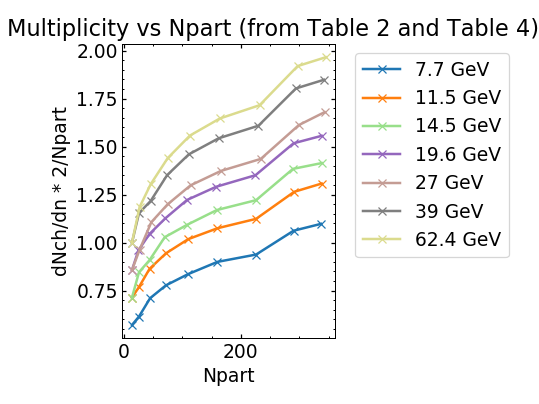

In [84]:

fig = plt.figure()

for index, energy_key in enumerate(energy_keys):
    # plot dNch/dn * 2/Npart vs Npart
    # approximate dNch/dn ≈ Nch (midrapidity)
    plt.plot(Npart[index], Nch[index] * 2/Npart[index], marker='x', #linestyle="None",
             color=cmap(index/len(energy_keys)), label=str(energy_key)+" GeV")
 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel(r"Npart")
plt.ylabel(r"dNch/dn * 2/Npart")
plt.title("Charge Multiplicity vs Npart (from Table 2 and Table 4)")    
plt.tight_layout()

## Comments

As you can see, there is an unexpected spike against the smooth trend in the data at higher $N_{part}$, specifically the 0-5% and 5-10% centrality bins. 